In the last lesson, we learned all about style sheets. We saw what styles come with a standard install of matplotlib and how to apply them, and we even took a few of them out for a test drive, but we haven't yet seen how to create one of our own. In this lesson, we'll rectify that last point by creating a style sheet that matches the look and feel of an xkcd cartoon.

But, before we do anything else, let's go ahead and get started by setting up our Jupyter notebook.

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Custom Style Sheets

In [3]:
mpl.get_data_path()

u'/Users/croach/anaconda/envs/mpl/lib/python2.7/site-packages/matplotlib/mpl-data'

In [4]:
import os

!cat {os.path.join(mpl.get_data_path(), 'stylelib', 'fivethirtyeight.mplstyle')}

#Author: Cameron Davidson-Pilon, replicated styles from FiveThirtyEight.com
# See https://www.dataorigami.net/blogs/fivethirtyeight-mpl

lines.linewidth: 4
lines.solid_capstyle: butt

legend.fancybox: true

axes.prop_cycle: cycler('color', ['30a2da', 'fc4f30', 'e5ae38', '6d904f', '8b8b8b'])
axes.facecolor: f0f0f0
axes.labelsize: large
axes.axisbelow: true
axes.grid: true
axes.edgecolor: f0f0f0
axes.linewidth: 3.0
axes.titlesize: x-large

patch.edgecolor: f0f0f0
patch.linewidth: 0.5

svg.fonttype: path

grid.linestyle: -
grid.linewidth: 1.0
grid.color: cbcbcb

xtick.major.size: 0
xtick.minor.size: 0
ytick.major.size: 0
ytick.minor.size: 0

font.size:14.0

savefig.edgecolor: f0f0f0
savefig.facecolor: f0f0f0

figure.subplot.left: 0.08
figure.subplot.right: 0.95 
figure.subplot.bottom: 0.07
figure.facecolor: f0f0f0


In [5]:
import inspect

from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter
from IPython.display import display, HTML

code = inspect.getsource(plt.xkcd)
display(HTML(highlight(code, PythonLexer(), HtmlFormatter(noclasses=True))))

In [10]:
import os
stylesheet_location = os.path.join(mpl.get_configdir(), 'xkcd.mplstyle')
print stylesheet_location

/Users/croach/.matplotlib/xkcd.mplstyle


In [11]:
import os

stylesheet_location = os.path.join(mpl.get_configdir(), 'xkcd.mplstyle')
stylesheet_content = """
font.family: Humor Sans, Comic Sans MS
font.size: 14.0
path.sketch: 1, 100, 2  # The default values from the xkcd function
axes.linewidth: 1.5
lines.linewidth: 2.0
figure.facecolor: white
grid.linewidth: 0.0
axes.grid: False
axes.unicode_minus: False
axes.prop_cycle: cycler('color', ['b', 'r', 'c', 'm'])
axes.edgecolor: black
xtick.major.size: 8
xtick.major.width: 3
ytick.major.size: 8
ytick.major.width: 3
"""

with open(stylesheet_location, 'w') as fout:
    fout.write(stylesheet_content.strip())

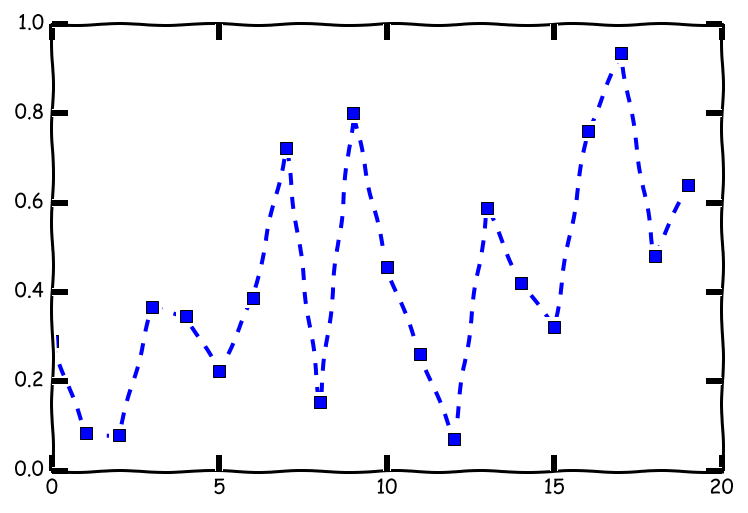

In [12]:
with plt.xkcd():
    plt.plot(np.random.rand(20))

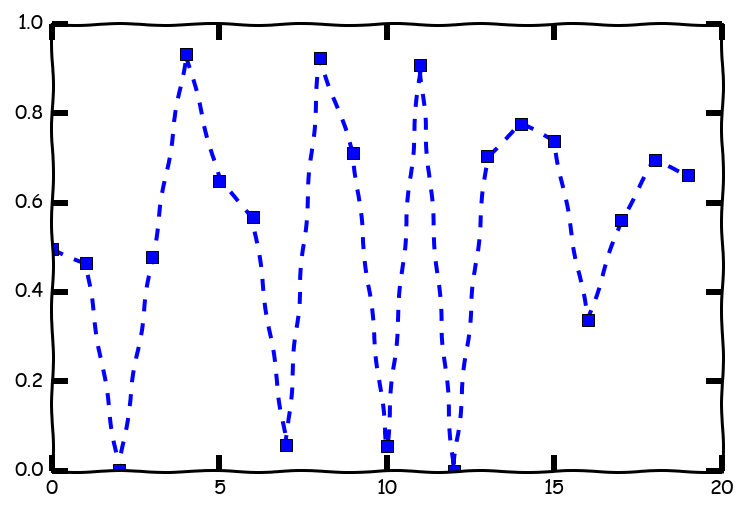

In [13]:
with plt.style.context('xkcd'):
    plt.plot(np.random.rand(20))

In [ ]:
plt.style.available

The matplotlib documentation has some [sample code][1] that uses the `xkcd()` function.

[1]: http://matplotlib.org/xkcd/examples/showcase/xkcd.html

In [ ]:
with plt.xkcd():

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.bar([-0.125, 1.0-0.125], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    plt.show()

In [ ]:
with plt.style.context('xkcd'):

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.bar([-0.125, 1.0-0.125], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    plt.show()